# | Life Expectancy Prediction | - 20494214

### According to the wikipedia, life expectancy is defined as the statistical measure of the average time an organism is expected to live, based on the year of its birth, its current age, and other demographic factors including biological sex.
### Fun fact: The life expectancy for Australia in 2020 was 83.50 years.
### Lets build the model that predicts the life expectancy, the data we are using is from Kaggle. We should have the data in the working directory to run the program. 

In [1]:
# I have stored the main data as life_data
import pandas as pd
import numpy as np
import re
life_data = pd.read_csv("Life_Expectancy_Data.csv", header = 'infer', index_col = None)
#just store the file (provided) in your working directory
len(life_data)

2938

### As you can see down below, the following table provides name of all column, data types, non - null values. The key take away from here is, there are lots of non-null values which needs to be imputed

In [2]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Dataset description

Country (nominal) - the country in which the indicators are from

Year (ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

Status (nominal) - whether a country is considered to be `Developing' or Developed' by WHO standards

Life Expectancy (ratio) - the life expectancy of people in years for a particular country and year

Adult Mortality (ratio) - the adult mortality rate per 1000 population(i.e. number of people dying between 15 and 60 years per 1000 population)

Infant Deaths (ratio) - number of infant deaths per a population of 1000 people; similar to above but for infants

Alcohol (ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

Percentage Expenditure (ratio) - expenditure on health as a percentage of Gross Domestic Product per capita

Hepatitis B (ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

Measles (ratio) - number of reported measles cases per a population of 1000 people

BMI (interval/ordinal) - average Body Mass Index of a country's total population

Under-Five Deaths (ratio) - number of deaths of people under the age of five per a population of 1000 people

Polio (ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

Total Expenditure (ratio) - government expenditure on health as a percentage of total government expenditure

Diphtheria (ratio) - Diphtheria Tetanus Toxoid and Pertussis (DTP3) immunization rate of 1 year olds

HIV/AIDS (ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births

GDP (ratio) - Gross Domestic Product per capita

Population (ratio) - population of a country

Thinness 1-19 Years (ratio) - rate of thinness among people aged 10-19

Thinness 5-9 Years (ratio) - rate of thinness among people aged 5-9

Income Composition Of Resources (ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling (ratio) - average number of years of schooling of a population


### The following table below gives us every statistical information on the data, for ex : mean, median etc

In [3]:
life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
#checking top 5 of the table
life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### The below code gives us all the histogram of every column.

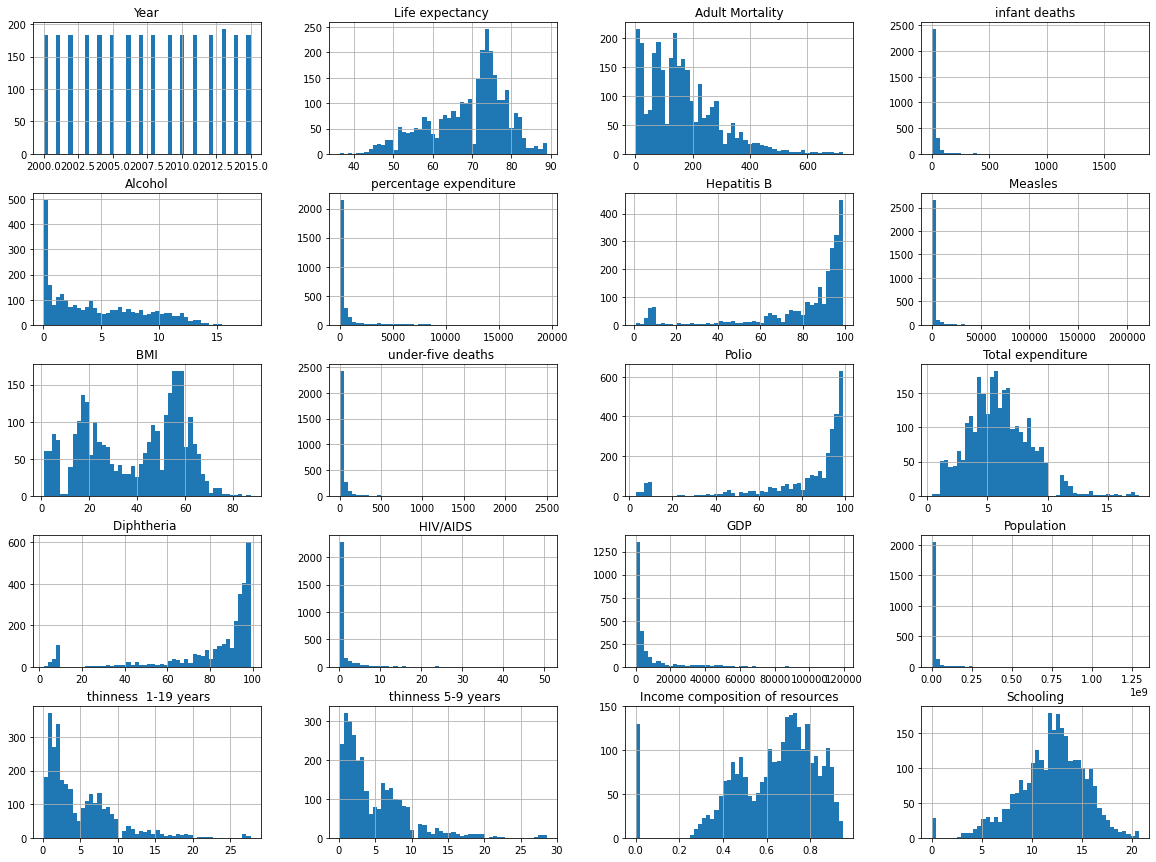

In [5]:
#plotting in a graph
%matplotlib inline
import matplotlib.pyplot as plt
life_data.hist(bins=50, figsize=(20,15))
plt.show()

C:\Users\KUSH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


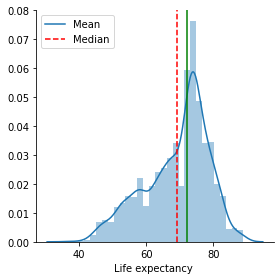

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
Life_mean = life_data['Life expectancy '].mean()
Life_median = life_data['Life expectancy '].median()

sns.FacetGrid(life_data, height=4) \
    .map(sns.distplot, 'Life expectancy ')
plt.axvline(Life_mean, color = 'r', linestyle = '--')
plt.axvline(Life_median, color = 'g', linestyle = '-')
plt.legend({'Mean':Life_mean, 'Median':Life_median})
plt.show()

Correlation is the absololute value of the Pearson linear correlation coefficient between target and the predictors which is given by the covariance divided by the product of the standard deviations. By the definition we know that correlation measures between linear relation between two feratures which helps us to choose most relevant feature to the least one. And this finally helps to make our predictor powerful against our binary target.

In [7]:
#checking corelation
corr_data = life_data.corr()
corr_data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


As you can see above, schooling has got the highest corelation ratio which is 0.75. Further heat map also shows more about correlation.

An heatmap is a graphical representation of data that uses a system of color-coding to represent dierent values. The primary purpose is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most. It is innately self-explanatory: the darker the shade, the greater the quantity (the higher the value, the tighter the dispersion, etc.). Said that, the inclusion of it within the elaborate is for showing correlations among the features.

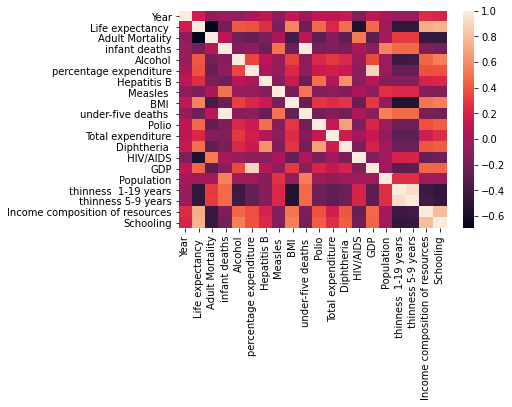

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_data)
plt.show()

## Scatter Plot
A scatter plot is a type of plot or mathematical diagram using cartesian coor-
dinates to display values for typically two variables for a set of data. The data
are displayed as a collection of points, each having the value of one variable de-
termining the position on the horizontal axis and the value of the other variable
determining the position on the vertical axis. A scatter plot can be used either
when one continuous variable that is under the control of the experimenter and the
other depends on it or when both continuous variables are independent. If exists a
parameter that is systematically incremented and/or decremented by the other, it
is called the control parameter or independent variable and is customarily plotted
along the horizontal axis.

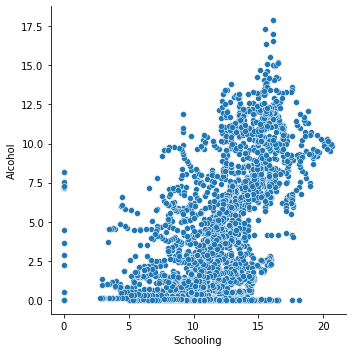

In [9]:
sns.FacetGrid(life_data, height=5) \
    .map(sns.scatterplot, 'Schooling', 'Alcohol')
plt.show()

### Data Pre Processing:

In [10]:
#checking column name in the list
col_names = life_data.columns.to_list()
col_names

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

We can also check null data using function bu passing the pandas data frame as an argument

In [11]:
def check_null(data):
    for i in data.columns:
        print(i,":", data[str(i)].isna().sum())

In [12]:
check_null(life_data)

Country : 0
Year : 0
Status : 0
Life expectancy  : 10
Adult Mortality : 10
infant deaths : 0
Alcohol : 194
percentage expenditure : 0
Hepatitis B : 553
Measles  : 0
 BMI  : 34
under-five deaths  : 0
Polio : 19
Total expenditure : 226
Diphtheria  : 19
 HIV/AIDS : 0
GDP : 448
Population : 652
 thinness  1-19 years : 34
 thinness 5-9 years : 34
Income composition of resources : 167
Schooling : 163


# As you can see there are large number of null data to be imputed, we will do that in further process

In [13]:
life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Here, we separate training datas and labels, for that we have to drop life expectancy column which is to be predicted but copied to the y - labels. Also , I am dropping Status column because it is highly corelated with GDP and Country column because it does not help much for the prediction.

In [14]:

y = life_data["Life expectancy "]
X1 = life_data.drop("Life expectancy ", axis = 1)
X1 = X1.drop("Status", axis = 1)
X1 = X1.drop("Country", axis = 1)

Splitting using Sklearn Libraries

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(2350, 19)

In [17]:
X_test.shape

(588, 19)

As you can see the datas are splitted now into 2350 rows of training and 588  rows of testing data

In [18]:
X_train.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
456,2007,126.0,0,5.28,345.463714,96.0,0,25.5,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9
462,2001,152.0,0,3.81,150.743486,NaN,0,22.1,0,91.0,5.19,9.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0
2172,2011,143.0,0,10.43,0.000000,99.0,0,44.5,0,99.0,7.58,99.0,0.1,NaN,NaN,4.3,4.3,0.733,12.9
2667,2013,13.0,3,1.29,594.645310,98.0,16,59.3,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7
381,2002,95.0,0,0.13,941.703687,99.0,0,28.0,0,99.0,3.40,94.0,0.1,16846.219800,NaN,6.7,6.1,0.820,13.3


In [19]:
X_test.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2546,2006,123.0,8,0.97,122.652333,83.0,517,48.5,10,83.0,3.78,8.0,0.1,1762.246170,18914977.0,6.4,6.3,0.636,11.4
650,2006,113.0,0,11.83,1555.651986,NaN,1,58.1,0,96.0,6.95,96.0,0.1,11363.418450,444.0,1.8,1.8,0.783,13.9
1740,2007,125.0,0,4.98,678.518894,9.0,0,57.2,0,92.0,6.74,92.0,0.1,5957.145693,615875.0,2.1,2.2,0.762,13.6
177,2014,7.0,0,1.57,367.255674,98.0,46,62.9,0,98.0,4.98,98.0,0.1,24983.379200,NaN,6.1,6.0,0.820,14.5
1377,2000,428.0,77,1.51,0.681686,NaN,21002,14.4,121,8.0,4.68,82.0,18.1,43.979713,3145483.0,9.2,9.1,0.448,8.4


Making only numerical data frame to use further in pipeline. For using imputer we need only numerical datas.

In [20]:
# lets differentiate the num category to use in the pipeline further
life_num = life_data.drop("Country", axis = 1)
life_num = life_num.drop("Status", axis = 1)
life_num = life_num.drop("Life expectancy ", axis = 1)

In [21]:
life_num.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### Constructing Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(life_num)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()),
])

In [24]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline)
])
X_test_prepared = full_pipeline.fit_transform(X_test)
X_train_prepared = full_pipeline.fit_transform(X_train)


In [25]:
X_test_prepared.shape

(588, 19)

In [26]:
X_train_prepared.shape

(2350, 19)

### There are lot of null values in the y - labels. For this I changed them into data frames and fill the missing value with its mean which are given below.

In [27]:
X_test_df = pd.DataFrame(X_test_prepared)
X_test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.312495,-0.313509,-0.203213,-0.903913,-0.323557,0.023898,-0.210468,0.559716,-0.212513,0.039494,-0.911061,-3.180920,-0.345151,-0.375400,0.086748,0.318533,0.287797,0.092413,-0.140876
1,-0.312495,-0.396839,-0.260574,1.811679,0.351876,0.401420,-0.257567,1.044991,-0.265916,0.590398,0.428526,0.591306,-0.345151,0.338167,-0.177308,-0.713161,-0.693785,0.771300,0.615745
2,-0.096067,-0.296843,-0.260574,0.098806,-0.061553,-3.080171,-0.257658,0.999497,-0.265916,0.420889,0.339784,0.419841,-0.345151,-0.063632,-0.168717,-0.645877,-0.606533,0.674316,0.524951
3,1.418925,-1.280141,-0.260574,-0.753880,-0.208265,0.653101,-0.253459,1.287629,-0.265916,0.675153,-0.403962,0.677038,-0.345151,1.350413,-0.158835,0.251248,0.222358,0.942176,0.797334
4,-1.611059,2.228066,0.291523,-0.768883,-0.381046,0.401420,1.659348,-1.164023,0.380260,-3.138798,-0.530737,-0.008821,3.903113,-0.503103,-0.133402,0.946521,0.898560,-0.775824,-1.048821


In [28]:
X_train_df = pd.DataFrame(X_train_prepared)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.116557,-0.317897,-0.257514,0.190375,-0.192120,0.563355,-0.200110,-0.657156,-0.262215,0.654218,-0.672494,0.655670,-0.225454,-0.260221,-0.187858,0.757278,0.713012,-0.158035,-0.045653
1,-1.417792,-0.109963,-0.257514,-0.186401,-0.291864,0.387715,-0.200110,-0.827479,-0.262215,0.353816,-0.303027,-3.094625,-0.187469,-0.399311,-0.188737,1.054068,1.004549,-0.356058,-0.322237
2,0.750932,-0.181940,-0.257514,1.510372,-0.369082,0.695084,-0.200110,0.294651,-0.262215,0.697132,0.689138,0.697808,-0.320418,-0.361129,-0.168721,-0.110264,-0.116749,0.490490,0.261663
3,1.184677,-1.221608,-0.230683,-0.832302,-0.064479,0.651174,-0.198729,1.036058,-0.242595,0.654218,0.556296,0.655670,-0.320418,-0.178190,-0.174933,0.369167,0.331771,0.426133,0.814833
4,-1.200920,-0.565817,-0.257514,-1.129622,0.113299,0.695084,-0.200110,-0.531918,-0.262215,0.697132,-1.046112,0.487117,-0.320418,0.776044,-0.168721,0.437657,0.286919,0.921190,0.384590


In [29]:
y_train.head()

456     72.3
462     73.0
2172    74.6
2667    74.9
381     74.8
Name: Life expectancy , dtype: float64

In [30]:
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,Life expectancy
456,72.3
462,73.0
2172,74.6
2667,74.9
381,74.8


In [31]:
check_null(y_train_df)

Life expectancy  : 8


In [32]:
y_train_df['Life expectancy '].fillna(y_train_df['Life expectancy '].mean(), inplace = True)

In [33]:
check_null(y_train_df)

Life expectancy  : 0


In [34]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Life expectancy
2546,73.7
650,75.9
1740,74.2
177,76.8
1377,51.9


In [35]:
check_null(y_test_df)

Life expectancy  : 2


In [36]:
y_test_df['Life expectancy '].fillna(y_test_df['Life expectancy '].mean(), inplace = True)

Changing all the data type into same float 64 to make sure not to loose information.

In [37]:
X_train_prepared = X_train_prepared.astype('float64')
y_train_prepared = y_train_df.astype('float64')
X_test_prepared = X_test_prepared.astype('float64')
y_test_prepared = y_test_df.astype('float64')

In [38]:
print(X_train_prepared.shape)
print(y_train_prepared.shape)
print(X_test_prepared.shape)
print(y_test_prepared.shape)

(2350, 19)
(2350, 1)
(588, 19)
(588, 1)


### Using Linear regression at first

Linear regression is a supervised learning and linear approach used for modeling
the relationship between a scalar response (or dependent variable) and one or more
explanatory variables (or independent variables). The case of one explanatory
variable is called simple linear regression. Simple linear regression models are used
to show or predict the relationship between two variables. The variable that is
being predicted (the one that solves the equation) is called the dependent variable;
the one used to predict the value of the dependent variable is called the independent
variable: in simpler terms, it is the `line that best fits to the points'.

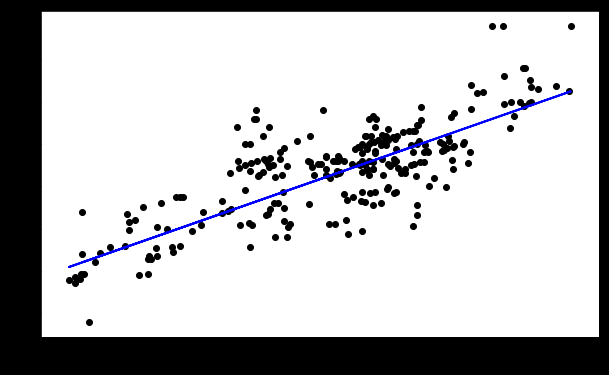

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
%timeit -n 100 -r 3 lin_reg.fit(X_train_prepared, y_train_prepared)

9.21 ms ± 668 µs per loop (mean ± std. dev. of 3 runs, 100 loops each)


### As you can see, it took 2.73 milli sec per loop for linear regression

In [40]:
Y_prediction = lin_reg.predict(X_test_prepared)
score = lin_reg.score(X_test_prepared, y_test_prepared)
score

0.8204934479424726

### Linear regression gave me 82% of acccuracy score

In [41]:
from sklearn.metrics import mean_squared_error
y_predictions = lin_reg.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test_prepared, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

3.943548317937193

In [42]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test_prepared, Y_prediction)
score * 100

82.04934479424726

## Using cross_val_score from sklearn to find the cv scores for linear regression

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X_train_prepared, y_train_prepared, scoring = 'r2', cv = 5)
scores

array([0.81799224, 0.83475037, 0.78457012, 0.79207591, 0.81637265])

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X_train_prepared, y_train_prepared, scoring = 'neg_mean_squared_error', cv = 5)
scores

array([-18.08157716, -15.64413604, -17.86233381, -18.54437924,
       -16.23041609])

### USing Randomized search cv to find the best models and parameters

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rand_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           }

# Instantiate RandomizedSearchCV model
random_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                              random_state=42),
                              param_distributions=rand_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
random_model.fit(X_train_prepared, y_train_prepared)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\KUSH\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

### Best parameters

In [46]:
random_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 0.5,
 'max_depth': None}

### Using Randomized Forest Regressor with the best hyper parameter

Random forest is a supervised learning algorithm that consists of a large number
of individual decision trees that operate using an ensemble method (Bootstrap
Aggregation, Bagging briefly). Ensemble methods use multiple learning algorithms
to obtain better predictive performance than could be obtained from any of the
constituent learning algorithms alone. Each individual tree in the random forest
produces a class prediction; the algorithm combines hundreds or thousands of
decision trees, training each of them on a slightly different set of observations,
splitting nodes in each tree and considering a limited number of the features for each
one.

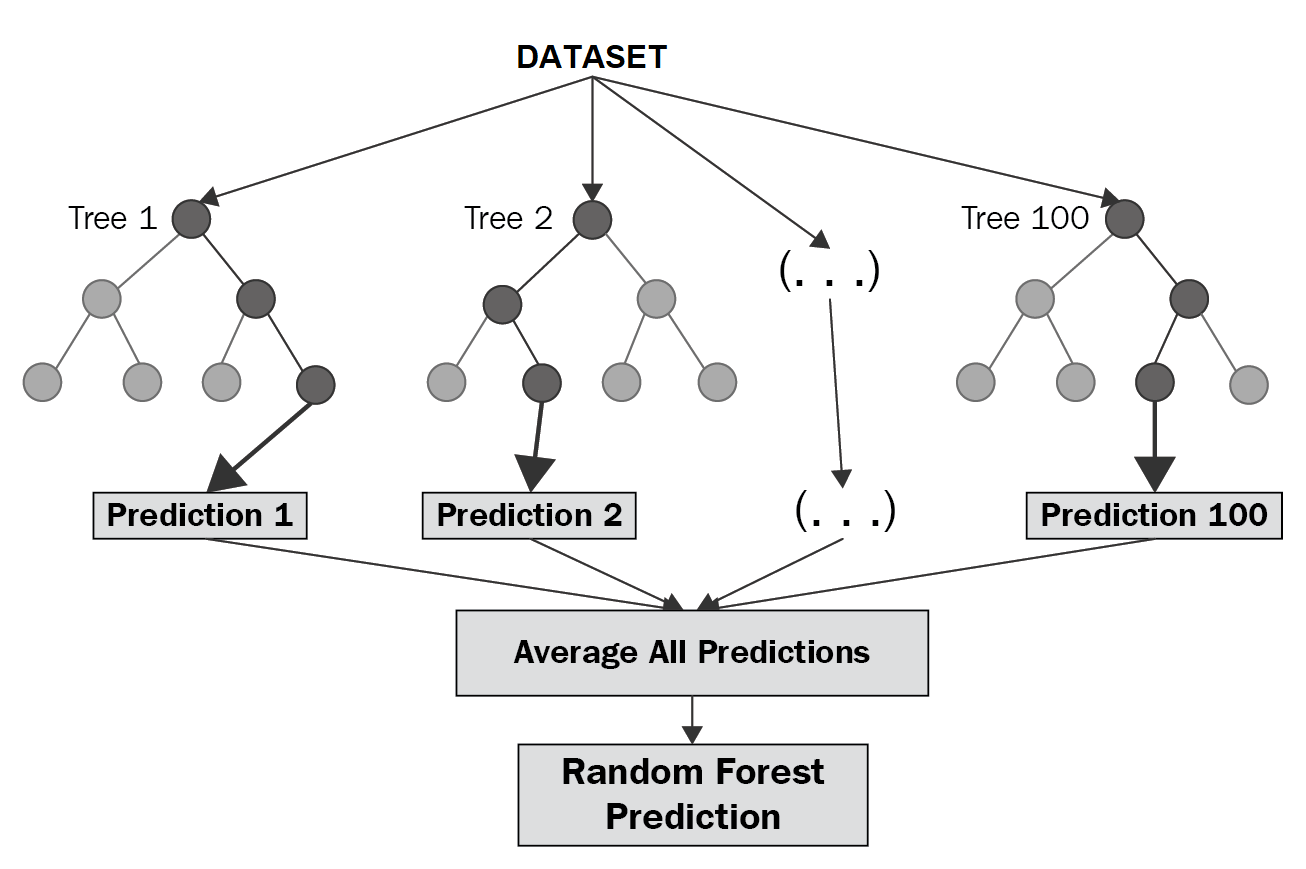

In [47]:
best_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_split=4,
                                    min_samples_leaf=3,
                                    max_features=0.5,
                                    max_depth=10,
                                    n_jobs=-1,
                                    random_state=101)

# Fit the ideal model
best_model.fit(X_train_prepared, y_train_prepared)

<ipython-input-47-aa7f3583f88a>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train_prepared, y_train_prepared)


RandomForestRegressor(max_depth=10, max_features=0.5, min_samples_leaf=3,
                      min_samples_split=4, n_estimators=40, n_jobs=-1,
                      random_state=101)

### Gave me score of 95 % which is higher than linear regression so choosing randomized forest regressor as the best model

In [48]:
best_model.score(X_test_prepared, y_test_prepared)

0.9537241959630756

Finding prediction values using best model

In [49]:
Y_prediction_final = best_model.predict(X_test_prepared)
Y_prediction_final

array([73.1646133 , 75.92855944, 74.7080019 , 76.28147726, 51.05030456,
       51.72215011, 67.90413791, 73.64826863, 76.01512021, 53.83999892,
       51.59511231, 54.32216706, 57.73554151, 74.05599253, 68.92849733,
       61.44448131, 56.64254127, 79.80740248, 69.02227353, 79.06296482,
       81.17347389, 82.89841008, 72.61131112, 68.86439503, 72.40588424,
       67.82320067, 59.34837721, 66.21979067, 82.43941422, 73.54224269,
       66.73514917, 74.47167942, 73.47094214, 71.99119404, 78.64061687,
       49.40352168, 59.87427856, 72.55054249, 64.28915996, 74.07580819,
       54.49926715, 61.86904671, 75.44086084, 80.96198889, 75.94590709,
       52.099187  , 80.23059482, 74.22605719, 60.84338299, 71.26408888,
       54.88083398, 71.5670797 , 81.98036875, 77.02668492, 74.63515864,
       55.8604929 , 73.51766124, 74.85505152, 65.15276199, 70.42925996,
       76.33282241, 54.3796001 , 74.27976651, 72.46597032, 53.41293207,
       54.90545437, 52.92120974, 77.00857821, 58.66401638, 73.59

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print("Mean squared error: %.2f"% mean_squared_error(y_test_prepared, Y_prediction_final))
print("Mean absolute error: %.2f"% mean_absolute_error(y_test_prepared, Y_prediction_final))
print('R_square score: %.2f' % r2_score(y_test_prepared, Y_prediction_final))


Mean squared error: 4.01
Mean absolute error: 1.37
R_square score: 0.95


In [51]:
best_model.feature_importances_

array([0.00621489, 0.20444728, 0.01214605, 0.00671577, 0.00336685,
       0.00146813, 0.00315769, 0.02133484, 0.015213  , 0.00449901,
       0.00511711, 0.00411425, 0.42981139, 0.00519355, 0.00249113,
       0.01049341, 0.01652438, 0.19454723, 0.05314404])

In [52]:
# Function for plotting feature importance
def plot_features(columns, importances):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"], df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

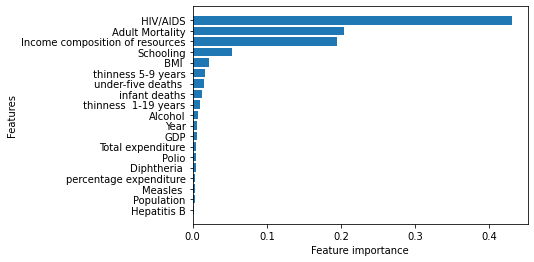

In [53]:
plot_features(X_train.columns, best_model.feature_importances_)

### As you can see in above plot, HIV/AIDS came to be very important features having very high feature importance for prediction whereas Hepatitis B is the lowest important feature. 

# Conclusion
The dataset started with 21 uncleaned features (including the target variable) and
has been pared down to 18 features to describe the target variable life expectancy
The first step was to give a general description about the dataset, the features and
the used tools so that a better understanding could be gathered. In conclusion the elaborate has been showed an investigation aimed at choosing
the relevant factors that affect the life expectancy with the attempt of generalising
the result although the different context present in the various countries; above
all it gave a concrete opportunity for deepening some topics explained during the
course. And Random Forest Regressor is turned out to be best model giving 95% score.